In [1]:
import torch
print('torch.cuda.is_available(): {}'.format(torch.cuda.is_available()))
import numpy as np
from utils import make_imb_data, get_cifar10_dist, plot_distribution
from models.wrn import WRN
from collections import Counter
import matplotlib.pyplot as plt

torch.cuda.is_available(): True


In [2]:
N_SAMPLES_PER_CLASS = make_imb_data(1250, 10, 100 ,False, False)
U_SAMPLES_PER_CLASS = make_imb_data(3 * 1250, 10, 100, False, False)
N_SAMPLES_PER_CLASS_T = torch.Tensor(N_SAMPLES_PER_CLASS)

train_labeled_set, train_unlabeled_set, test_set = get_cifar10_dist('/home/apoorva/Datasets', N_SAMPLES_PER_CLASS
, U_SAMPLES_PER_CLASS)

max_num=1250
[1250, 749, 449, 269, 161, 96, 58, 34, 20, 12]
max_num=3750
[3750, 2248, 1347, 807, 484, 290, 174, 104, 62, 37]
Files already downloaded and verified
#Labeled: 3098 #Unlabeled: 12401


In [3]:
def create_model(ema=False):
    model = WRN(2, len(N_SAMPLES_PER_CLASS))
    model = model.cuda()

    if ema:
        for param in model.parameters():
            param.detach_()

    return model

model = create_model()
ema_model = create_model(ema=True)

Counter({1: 16, 3: 16, 8: 15, 9: 14, 5: 14, 0: 13, 4: 13, 6: 11, 2: 9, 7: 7})


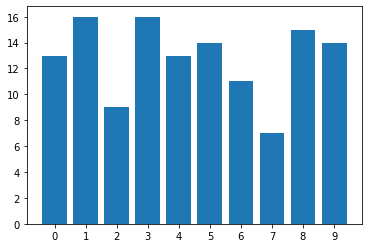

Counter({6: 16, 8: 15, 2: 15, 9: 15, 5: 14, 0: 13, 7: 13, 4: 12, 1: 10, 3: 5})


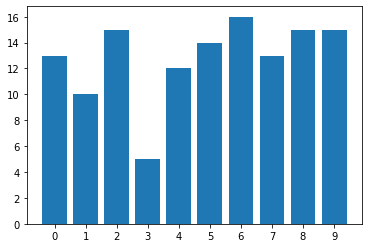

Counter({4: 16, 0: 15, 5: 15, 1: 14, 8: 14, 6: 13, 9: 12, 2: 11, 3: 10, 7: 8})


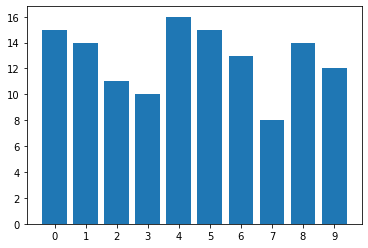

Counter({9: 22, 1: 16, 7: 16, 2: 14, 5: 13, 3: 12, 6: 10, 0: 10, 8: 8, 4: 7})


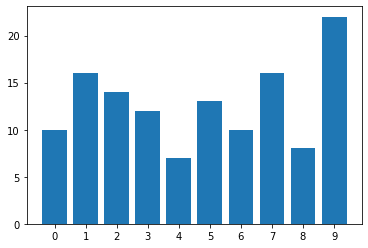

Counter({1: 17, 5: 16, 7: 15, 4: 14, 9: 13, 3: 13, 6: 12, 8: 10, 2: 9, 0: 9})


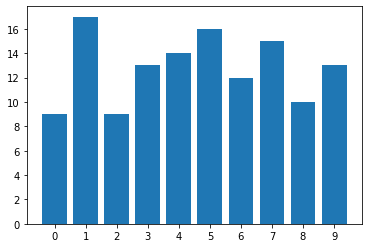

Counter({5: 21, 1: 15, 7: 14, 6: 14, 0: 13, 2: 12, 8: 11, 4: 10, 3: 9, 9: 9})


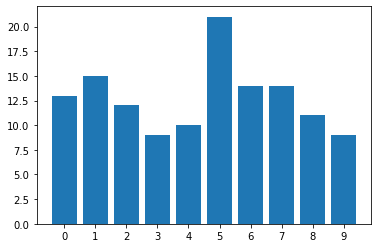

Counter({9: 20, 7: 18, 4: 16, 1: 14, 8: 13, 5: 11, 0: 11, 3: 10, 2: 9, 6: 6})


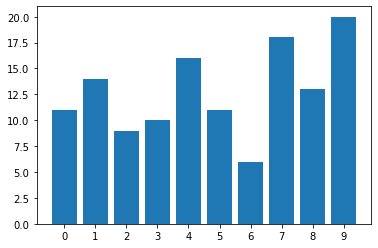

Counter({7: 19, 6: 15, 3: 15, 5: 14, 2: 13, 9: 12, 4: 11, 1: 10, 8: 10, 0: 9})


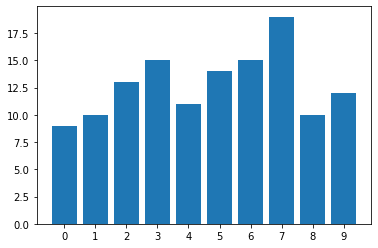

Counter({9: 18, 3: 17, 1: 15, 8: 15, 0: 14, 5: 12, 2: 11, 6: 10, 7: 9, 4: 7})


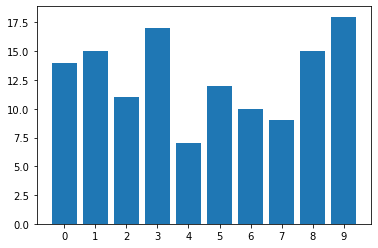

Counter({7: 17, 2: 16, 5: 15, 1: 13, 4: 13, 9: 11, 8: 11, 0: 11, 3: 11, 6: 10})


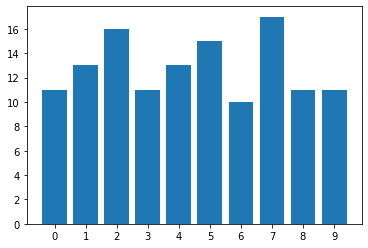

Counter({7: 18, 4: 17, 1: 14, 6: 14, 2: 14, 0: 11, 9: 11, 5: 11, 3: 10, 8: 8})


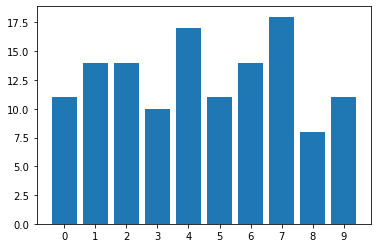

Counter({5: 20, 0: 19, 2: 14, 6: 13, 7: 12, 8: 11, 3: 11, 4: 11, 9: 10, 1: 7})


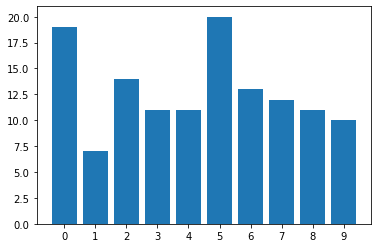

Counter({7: 17, 0: 17, 2: 15, 4: 15, 1: 15, 8: 14, 5: 12, 6: 9, 9: 7, 3: 7})


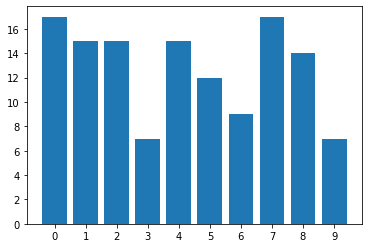

Counter({6: 16, 4: 15, 8: 15, 1: 14, 9: 13, 0: 13, 7: 13, 3: 10, 5: 10, 2: 9})


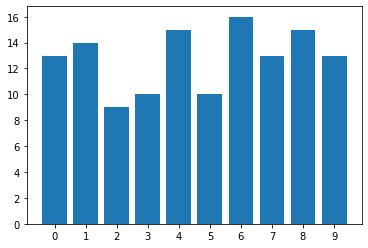

Counter({0: 20, 7: 18, 9: 18, 6: 13, 4: 13, 3: 13, 2: 11, 5: 9, 8: 9, 1: 4})


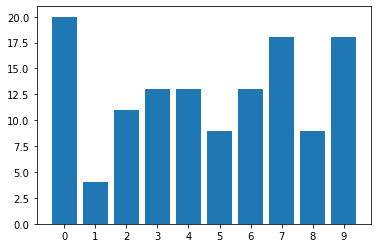

Counter({3: 18, 1: 17, 6: 15, 4: 15, 8: 14, 9: 11, 2: 11, 7: 10, 0: 9, 5: 8})


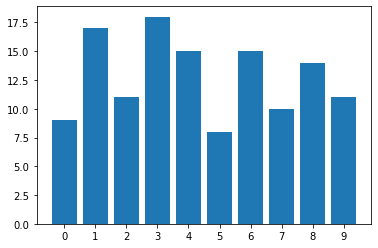

Counter({5: 16, 4: 16, 2: 15, 6: 14, 3: 14, 8: 12, 7: 11, 1: 11, 9: 10, 0: 9})


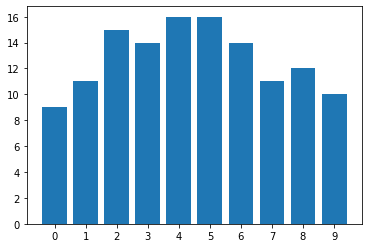

Counter({9: 17, 2: 17, 1: 15, 0: 13, 4: 12, 7: 11, 8: 11, 6: 11, 5: 11, 3: 10})


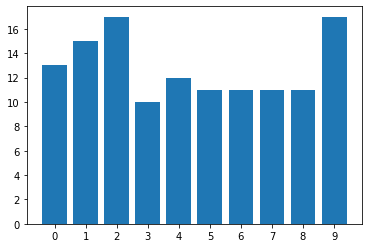

Counter({1: 18, 2: 15, 8: 15, 5: 15, 4: 13, 7: 12, 3: 11, 6: 10, 9: 10, 0: 9})


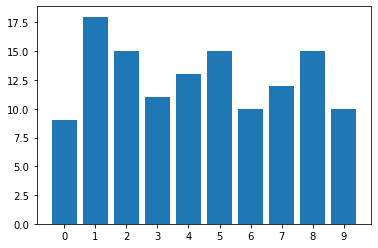

Counter({5: 23, 6: 17, 1: 13, 3: 13, 7: 12, 9: 12, 4: 12, 8: 11, 0: 8, 2: 7})


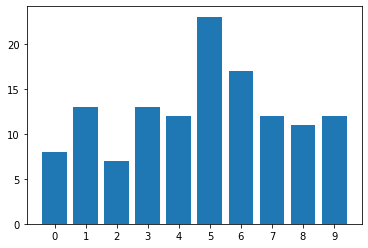

Counter({4: 18, 0: 17, 7: 17, 1: 15, 3: 12, 6: 11, 2: 10, 9: 10, 8: 9, 5: 9})


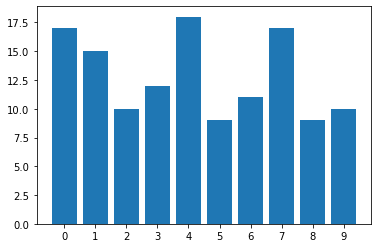

Counter({3: 18, 0: 15, 4: 14, 7: 14, 9: 14, 2: 14, 6: 12, 1: 11, 8: 10, 5: 6})


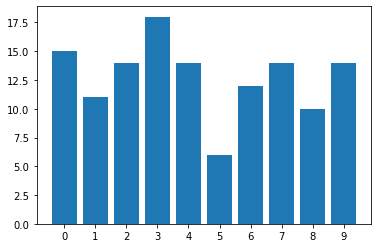

Counter({7: 24, 8: 19, 0: 13, 9: 12, 1: 12, 4: 12, 3: 10, 6: 10, 2: 8, 5: 8})


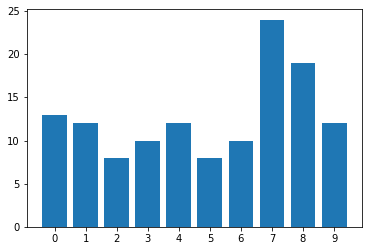

Counter({5: 19, 8: 17, 2: 16, 1: 14, 4: 14, 3: 13, 7: 12, 0: 12, 9: 6, 6: 5})


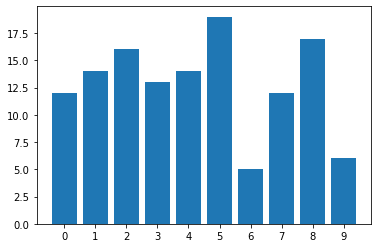

Counter({5: 5, 9: 3, 8: 3, 3: 3, 1: 3, 2: 3, 7: 2, 6: 2, 0: 1, 4: 1})


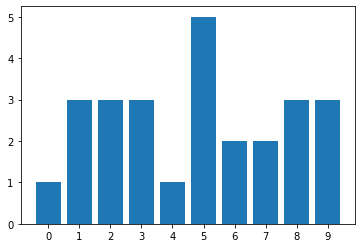

In [6]:
from sampler import UnlabeledDataLoader_test
list_dist = np.zeros(10)
target_dist = torch.ones([10, 10])
labeled_loader = torch.utils.data.DataLoader(train_labeled_set, batch_size=128, num_workers=8, shuffle=True)
for imgs, lbls, _ in labeled_loader:
    ulb_loader = UnlabeledDataLoader_test(train_unlabeled_set, target_dist, N_SAMPLES_PER_CLASS, 128)
    img_u, ulb_u = ulb_loader.get_batch(lbls)
    ulb_u = ulb_u.numpy()
    for i in ulb_u:
        list_dist[i]+=1
    plot_distribution(Counter(ulb_u))
print(list_dist)